In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV files
train_df = pd.read_csv("C:/Users/Administrator/Downloads/train.csv")
test_df = pd.read_csv("C:/Users/Administrator/Downloads/test.csv")

# Combine them vertically
data = pd.concat([train_df, test_df], ignore_index=True)

# Save to a new file if needed
data.to_csv("merged_data.csv", index=False)

data

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1.0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0.0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0.0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0.0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56906,CST_142412,Solarina,53,F,N,N,0.0,266824.38,3051.0,Sales staff,1.0,0.0,17791.56,64483.93,74,823.0,0,0,NaN
56907,CST_107967,Jonathan Cable,33,F,NaN,N,0.0,124310.85,365248.0,Unknown,1.0,0.0,26576.79,29851.73,60,712.0,0,0,NaN
56908,CST_134002,Robin,27,M,Y,Y,1.0,364652.81,3431.0,Laborers,3.0,0.0,28658.55,69336.96,67,674.0,0,0,NaN
56909,CST_146856,Lauren,36,F,N,Y,0.0,128769.02,16320.0,Medicine staff,1.0,0.0,11527.38,26908.03,17,684.0,0,0,NaN


In [3]:
# Check if any row in the merged DataFrame equals the column names
mask = (data == list(data.columns)).all(axis=1)

# Show rows where this happens
header_rows = data[mask]
print(header_rows)

Empty DataFrame
Columns: [customer_id, name, age, gender, owns_car, owns_house, no_of_children, net_yearly_income, no_of_days_employed, occupation_type, total_family_members, migrant_worker, yearly_debt_payments, credit_limit, credit_limit_used(%), credit_score, prev_defaults, default_in_last_6months, credit_card_default]
Index: []


In [4]:
data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1.0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0.0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0.0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0.0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0.0


In [5]:
data["credit_card_default"].value_counts(normalize=True)

credit_card_default
0.0    0.918797
1.0    0.081203
Name: proportion, dtype: float64

In [6]:
df = data.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
13726,CST_121931,David Milliken,42,M,Y,Y,0.0,510235.35,1195.0,Laborers,1.0,0.0,36638.24,138111.77,41,942.0,0,0,0.0
28269,CST_143895,Mirna,34,M,Y,N,1.0,241751.55,3044.0,Unknown,3.0,1.0,16568.29,34138.68,21,897.0,0,0,0.0
35949,CST_111287,Nicola Leske,29,F,N,Y,0.0,151943.32,7131.0,Unknown,2.0,0.0,8735.32,34747.47,10,745.0,0,0,0.0
49511,CST_124177,Smith Douglas,53,F,Y,N,0.0,308712.07,5547.0,Sales staff,1.0,0.0,35362.25,74242.46,20,670.0,0,0,NaN
55625,CST_136158,Michael,44,F,N,Y,0.0,268767.03,365252.0,Unknown,2.0,0.0,13707.06,62115.41,75,771.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50872,CST_104715,Saeed Azhar,34,F,N,Y,0.0,151679.17,4519.0,Unknown,1.0,0.0,38811.67,18721.22,51,665.0,0,0,NaN
40311,CST_112250,Kevin Drawbaugh,46,F,N,Y,0.0,313616.68,10200.0,Laborers,2.0,0.0,18003.68,107733.08,56,854.0,0,0,0.0
32461,CST_121385,Kell,50,F,NaN,Y,2.0,569766.40,151.0,Accountants,4.0,1.0,86109.04,89113.78,56,843.0,0,0,0.0
30906,CST_126453,Martinne Geller,55,F,N,Y,0.0,158206.14,365247.0,Unknown,2.0,0.0,35924.66,26391.48,16,833.0,0,0,0.0


In [7]:
# check shape and length
print(df.shape)

(30000, 19)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 13726 to 22404
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29651 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29479 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29712 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29945 non-null  float64
 11  migrant_worker           29950 non-null  float64
 12  yearly_debt_payments     29937 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

In [9]:
#gives object type column name
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
#gives non object type column name
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))


no of cat feats:  6
no of num feats:  13


In [10]:

num_feats


['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [11]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [12]:
#checks for duplicate
df.duplicated().sum()

np.int64(0)

In [13]:
#checks for missing value(NaN)
df.isnull().sum().sort_values(ascending=False).head(10)

credit_card_default     5920
no_of_children           521
owns_car                 349
no_of_days_employed      288
yearly_debt_payments      63
total_family_members      55
migrant_worker            50
credit_score               5
age                        0
customer_id                0
dtype: int64

In [14]:
print(df["credit_card_default"].value_counts())
print(df["credit_card_default"].value_counts(normalize=True))

credit_card_default
0.0    22108
1.0     1972
Name: count, dtype: int64
credit_card_default
0.0    0.918106
1.0    0.081894
Name: proportion, dtype: float64


In [15]:
#checks for number of missing (NaN) values in the categorical columns
print(df[cat_feats].isnull().sum())

customer_id          0
name                 0
gender               0
owns_car           349
owns_house           0
occupation_type      0
dtype: int64


In [16]:
#print the distribution of values (as percentages)
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
customer_id
CST_121931    0.000033
CST_143895    0.000033
CST_111287    0.000033
CST_124177    0.000033
CST_136158    0.000033
                ...   
CST_104715    0.000033
CST_112250    0.000033
CST_121385    0.000033
CST_126453    0.000033
CST_107338    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan              0.004567
David                 0.004167
Jonathan Stempel      0.003800
Stempel               0.003600
Jessica               0.003600
                        ...   
Singh Suvashree       0.000033
Rojas                 0.000033
Tamim                 0.000033
ill Trott             0.000033
Gabriela Baczynska    0.000033
Name: proportion, Length: 3492, dtype: float64


Column Name: gender
gender
F      0.659867
M      0.340100
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.662102
Y    0.337898
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6

In [17]:
#filter rows in your DataFrame df
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0.0


In [18]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

gender
F    19796
M    10204
Name: count, dtype: int64

In [19]:
# fill missing values (NaN) with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9052\4059146536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)


In [20]:
df["owns_car"].value_counts(normalize=True)

owns_car
N    0.666033
Y    0.333967
Name: proportion, dtype: float64

In [21]:
df[cat_feats].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

In [22]:
#Numerical features
#top 10 numerical features in your DataFrame that have the most missing values
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

credit_card_default     5920
no_of_children           521
no_of_days_employed      288
yearly_debt_payments      63
total_family_members      55
migrant_worker            50
credit_score               5
net_yearly_income          0
age                        0
credit_limit_used(%)       0
dtype: int64

In [23]:
#no_of_days_employed
#fill missing values based on the median
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [24]:
#count the total number of missing (NaN) values 
df.no_of_days_employed.isna().sum()

np.int64(0)

In [25]:
#yearly_debt_payments
#If a group median is NaN, fill with the overall median:
df['yearly_debt_payments'] = df['yearly_debt_payments'].fillna(
    df.groupby('credit_card_default')['yearly_debt_payments'].transform('median')
)
df['yearly_debt_payments'] = df['yearly_debt_payments'].fillna(df['yearly_debt_payments'].median())



In [26]:
df['yearly_debt_payments'].isna().sum()

np.int64(0)

In [27]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

credit_card_default     5920
no_of_children           521
total_family_members      55
migrant_worker            50
credit_score               5
dtype: int64

In [28]:
df['migrant_worker'].mode()

0    0.0
Name: migrant_worker, dtype: float64

In [29]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9052\341355721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)


np.int64(0)

In [30]:
#total_family_members
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)
# check null values count
df['total_family_members'].isna().sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9052\3441678093.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)


np.int64(0)

In [31]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

credit_card_default    5920
no_of_children          521
credit_score              5
age                       0
net_yearly_income         0
dtype: int64

In [32]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9052\1293685831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)


In [33]:
# Fill missing credit_score based on group median
df['credit_score'] = df['credit_score'].fillna(
    df.groupby('credit_card_default')['credit_score'].transform('median')
)

# Fill any remaining NaN with overall median
df['credit_card_default'].fillna(df['credit_card_default'].mode()[0], inplace=True)


# Verify
df['credit_score'].isna().sum()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9052\3138362677.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['credit_card_default'].fillna(df['credit_card_default'].mode()[0], inplace=True)


np.int64(1)

In [34]:
df[num_feats].isnull().sum().sort_values(ascending = False)

credit_score               1
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
age                        0
total_family_members       0
migrant_worker             0
credit_limit               0
yearly_debt_payments       0
credit_limit_used(%)       0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [35]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               1
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

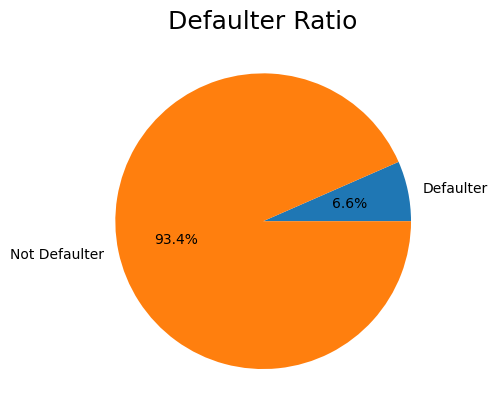

In [36]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%')
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9052\265951273.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


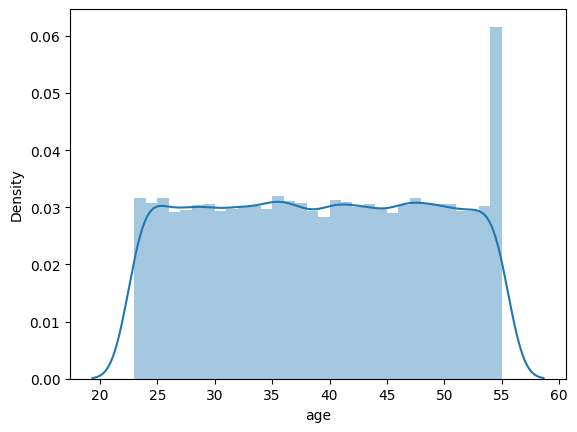

In [37]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(df['age'])
plt.show()

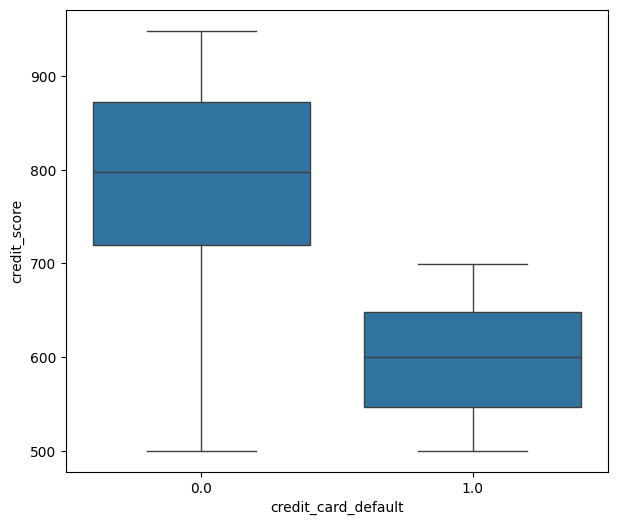

In [38]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7, 6])
sns.boxplot(x='credit_card_default', y='credit_score', data=df)
plt.show()


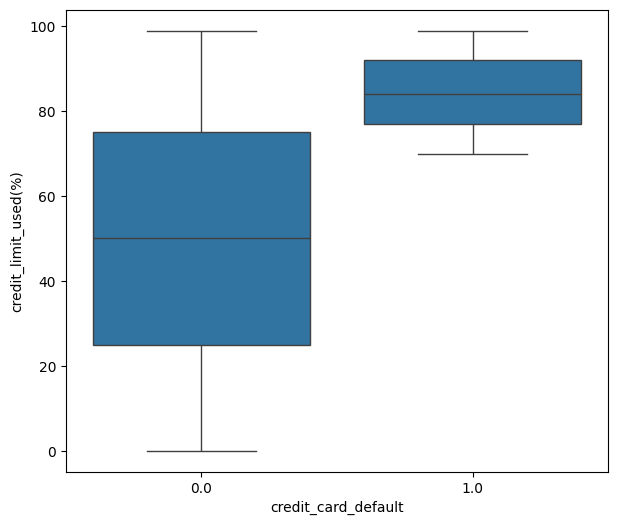

In [39]:
plt.figure(figsize=[7, 6])
sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=df)
plt.show()

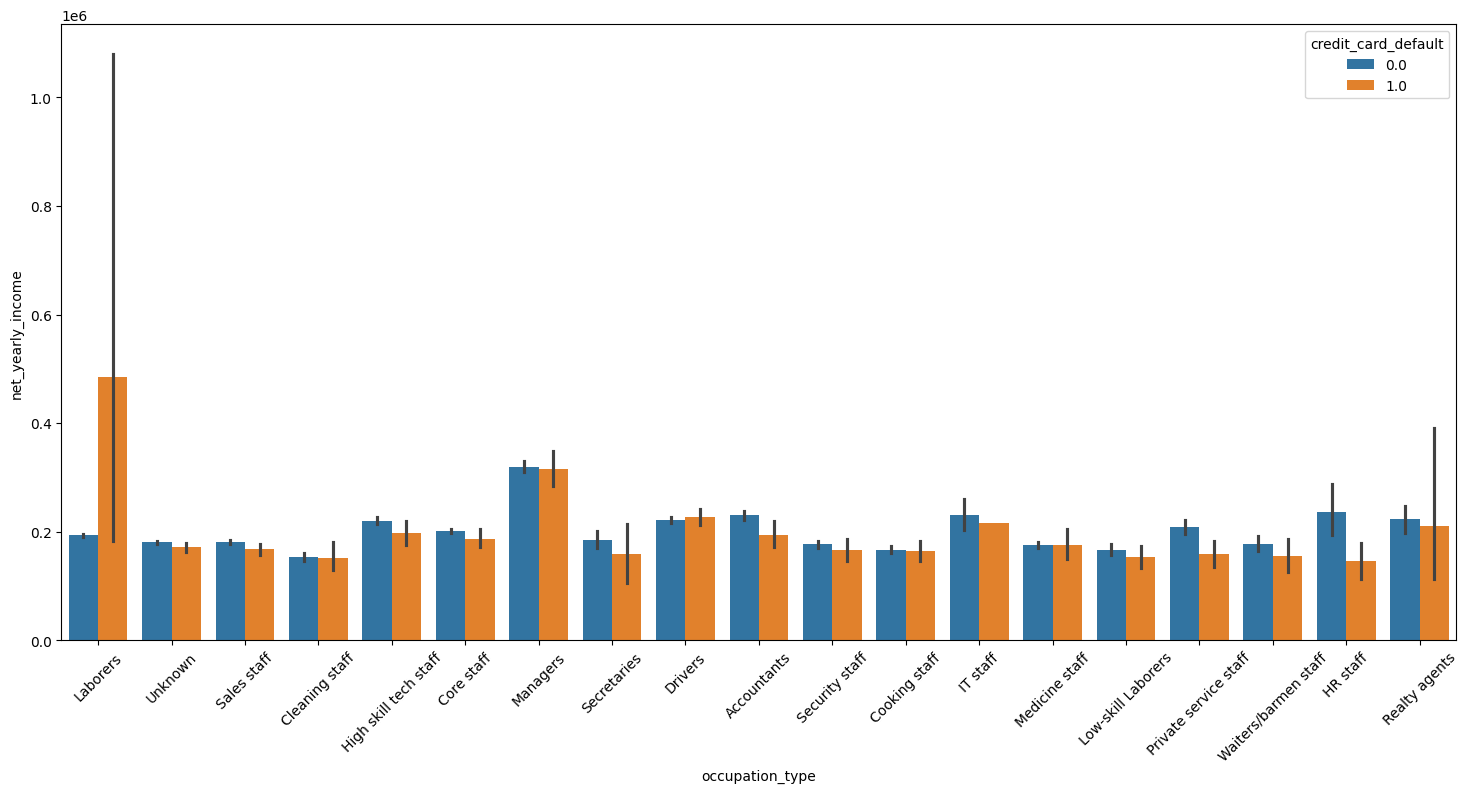

In [40]:
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()


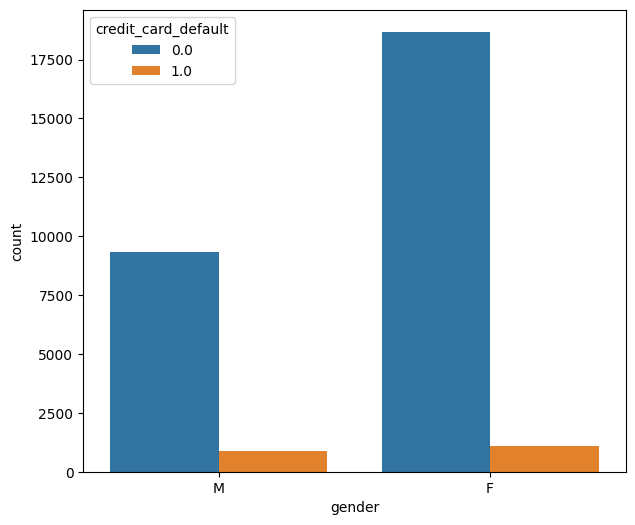

In [41]:
plt.figure(figsize=[7, 6])
sns.countplot(x='gender', hue='credit_card_default', data=df)
plt.show()

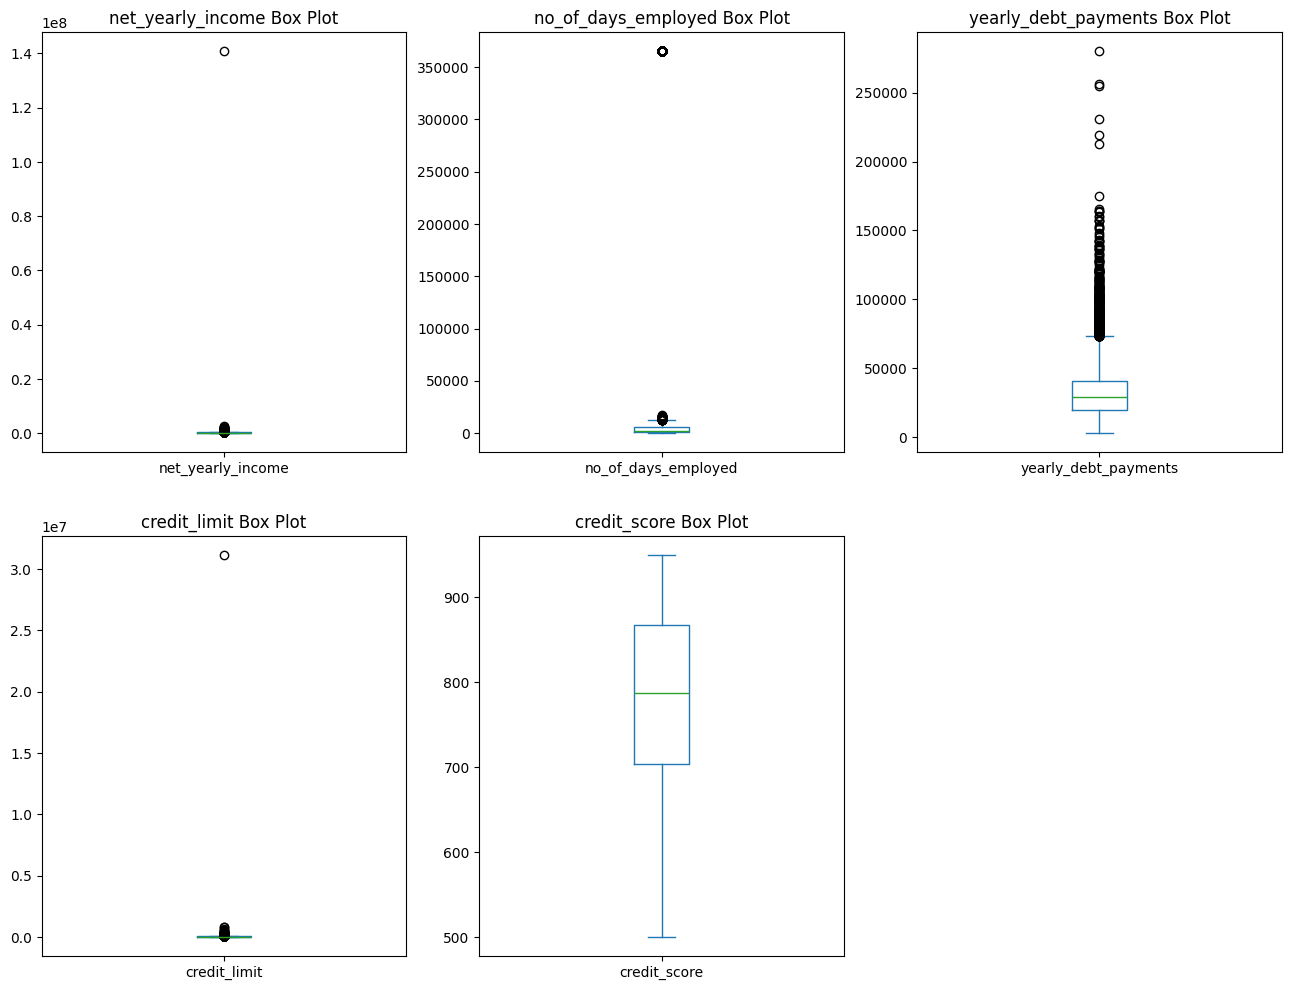

In [42]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

In [43]:
def detect_outliers_iqr(data, columns):
    outlier_summary = {}

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
    
    return outlier_summary

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = detect_outliers_iqr(df, numeric_cols)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


age: 0 outliers
no_of_children: 451 outliers
net_yearly_income: 1278 outliers
no_of_days_employed: 5457 outliers
total_family_members: 429 outliers
migrant_worker: 5314 outliers
yearly_debt_payments: 726 outliers
credit_limit: 1335 outliers
credit_limit_used(%): 0 outliers
credit_score: 0 outliers
prev_defaults: 1586 outliers
default_in_last_6months: 1499 outliers
credit_card_default: 1972 outliers


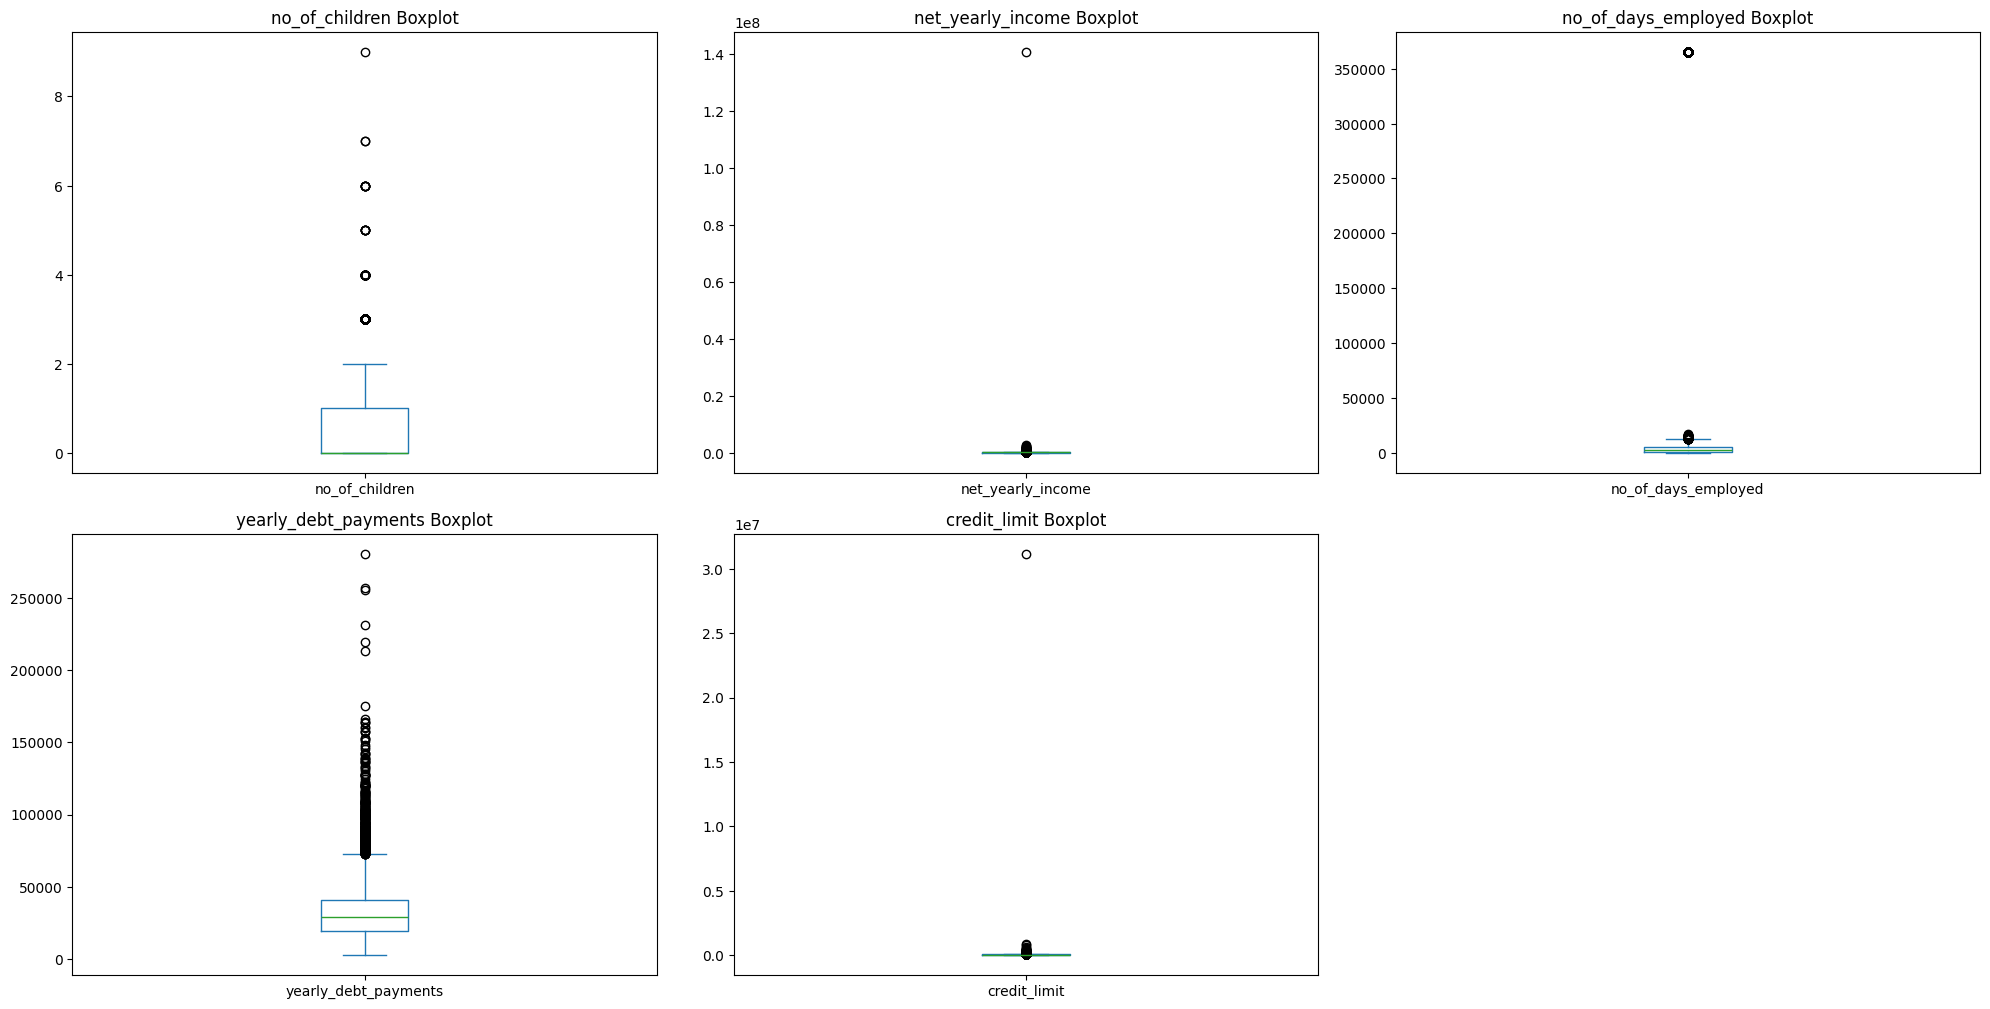

In [44]:
import matplotlib.pyplot as plt

cols_with_outliers = [
    'no_of_children', 'net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit'
]

plt.figure(figsize=(20, 20))

for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(4, 3, i)
    df[col].plot.box()
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

In [45]:
# List of columns with outliers
outlier_cols = ['no_of_children', 'net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit']

# Remove outliers using IQR method
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [46]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Columns with outliers
cols_with_outliers = [
    'no_of_children', 'net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit'
]

# Apply the function
df_cleaned = remove_outliers_iqr(df, cols_with_outliers)


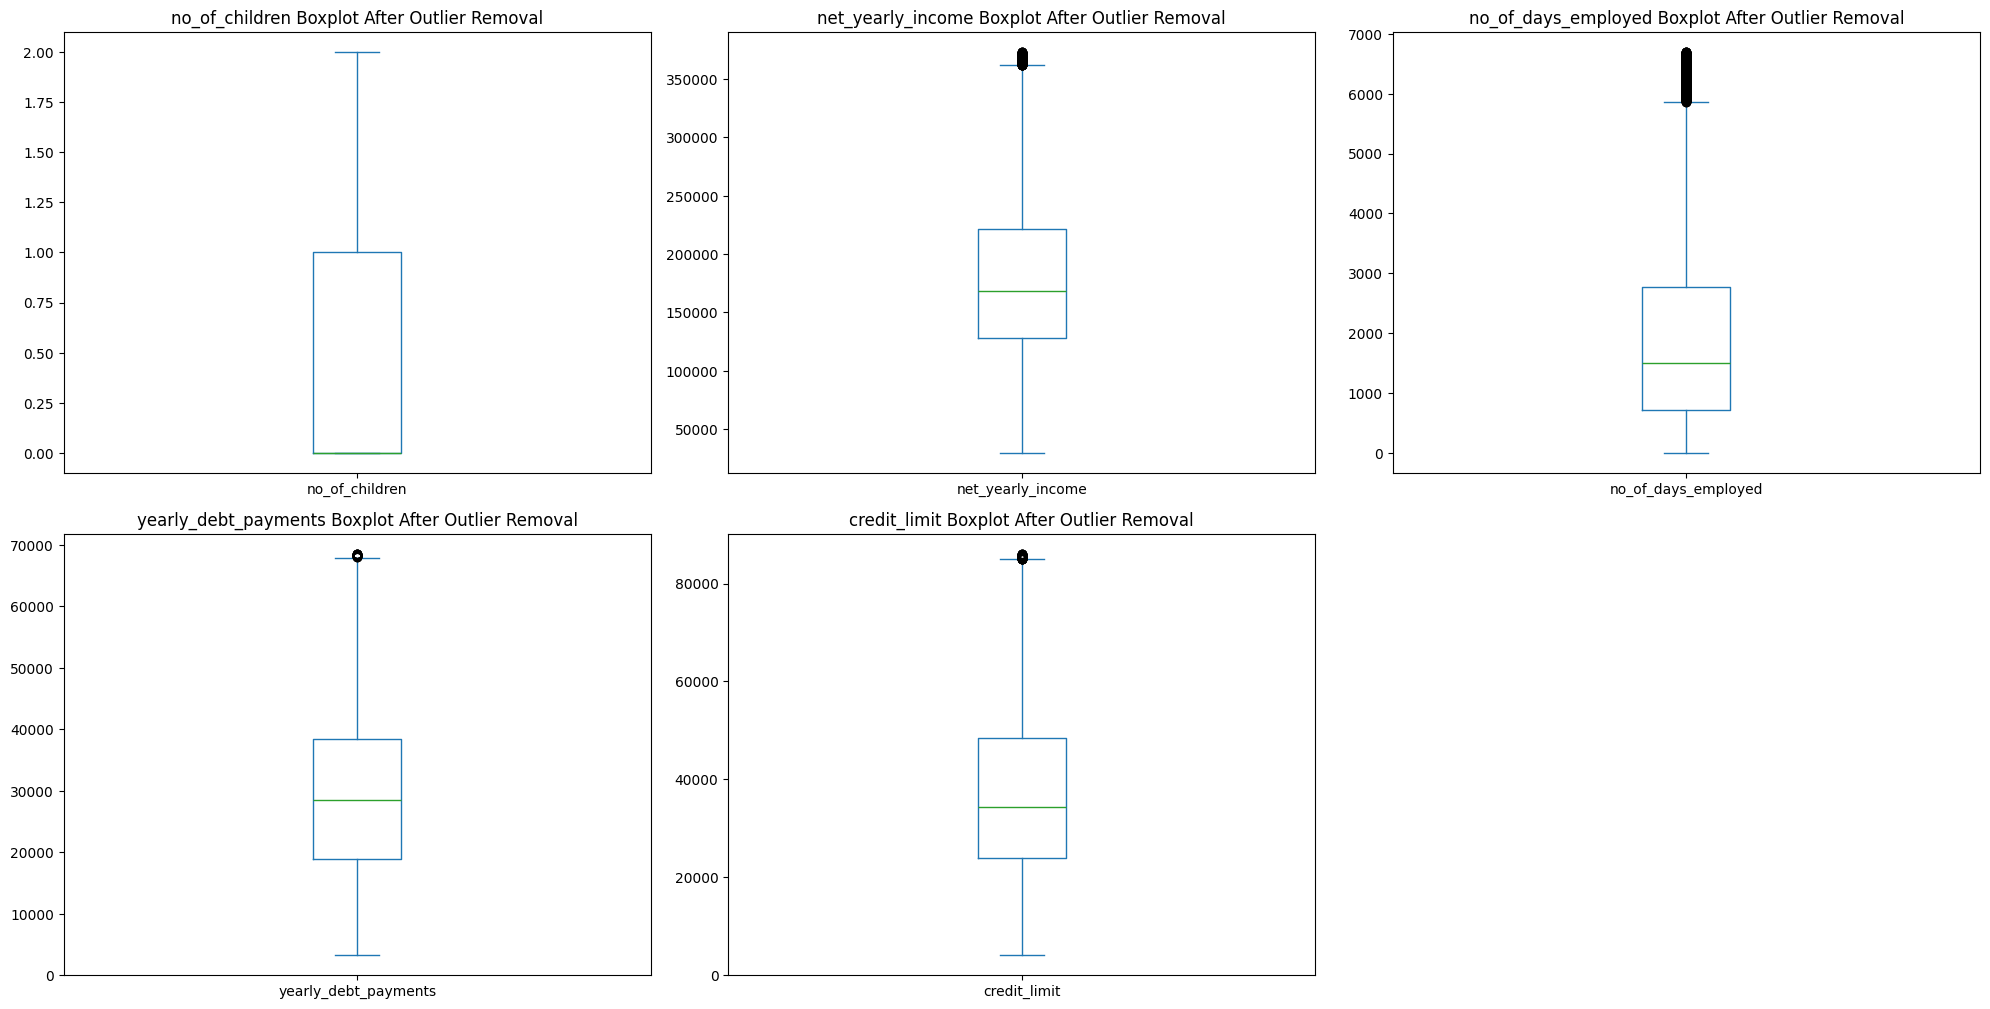

In [47]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(4, 3, i)
    df_cleaned[col].plot.box()
    plt.title(f'{col} Boxplot After Outlier Removal')

plt.tight_layout()
plt.show()

In [48]:
print("Original shape:", df.shape)
print("After removing outliers:", df_cleaned.shape)
df=df_cleaned

Original shape: (21793, 19)
After removing outliers: (19781, 19)


In [49]:
import pandas as pd

# Encode gender: M → 1, F → 0
df["gender"] = df["gender"].map({"M": 1, "F": 0})

# Encode owns_car: Y → 1, N → 0
df["owns_car"] = df["owns_car"].map({"Y": 1, "N": 0})

# Encode owns_house: Y → 1, N → 0
df["owns_house"] = df["owns_house"].map({"Y": 1, "N": 0})
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28269,CST_143895,Mirna,34,1,1,0,1.0,241751.55,3044.0,Unknown,3.0,1.0,16568.29,34138.68,21,897.0,0,0,0.0
49511,CST_124177,Smith Douglas,53,0,1,0,0.0,308712.07,5547.0,Sales staff,1.0,0.0,35362.25,74242.46,20,670.0,0,0,0.0
16354,CST_154212,Marsh,48,0,0,1,0.0,71603.94,451.0,Cleaning staff,1.0,0.0,16140.65,10926.23,30,662.0,0,0,0.0
31454,CST_131569,Tim,49,0,1,0,0.0,162331.01,5424.0,Sales staff,2.0,0.0,32132.05,48369.73,8,926.0,0,0,0.0
936,CST_140361,en,30,0,1,0,0.0,219773.41,2256.0,Unknown,2.0,0.0,16868.46,58695.23,39,832.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,CST_107728,Joe Brock,29,0,0,1,1.0,110625.32,2541.0,Core staff,2.0,0.0,23409.04,26073.90,86,813.0,0,0,0.0
41595,CST_155793,Shih,54,0,0,1,0.0,259753.20,742.0,Sales staff,2.0,0.0,29954.60,43590.55,90,870.0,0,0,0.0
46008,CST_132966,Tarmo,29,0,0,1,1.0,85449.90,791.0,Sales staff,2.0,0.0,8918.57,16987.64,37,762.0,0,0,0.0
50824,CST_125532,LaCapra,37,1,1,0,0.0,214208.75,217.0,Drivers,2.0,1.0,24677.75,31853.08,81,754.0,0,0,0.0


In [50]:
# If your cleaned DataFrame is named 'df_cleaned'
df_cleaned.to_csv("cleaned_credit_data.csv", index=False)

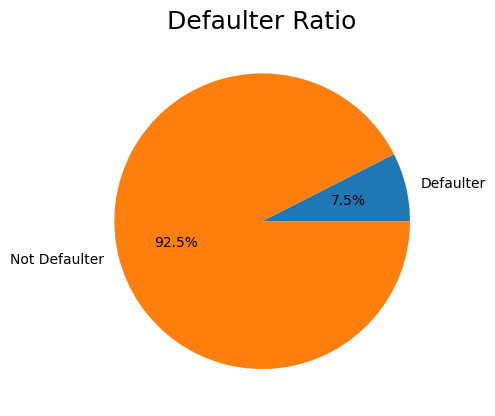

In [51]:
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%')
plt.title('Defaulter Ratio', fontsize=18)
plt.show()